<a href="https://colab.research.google.com/github/10zinchosang/Trading-Projects/blob/main/Options_Valution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

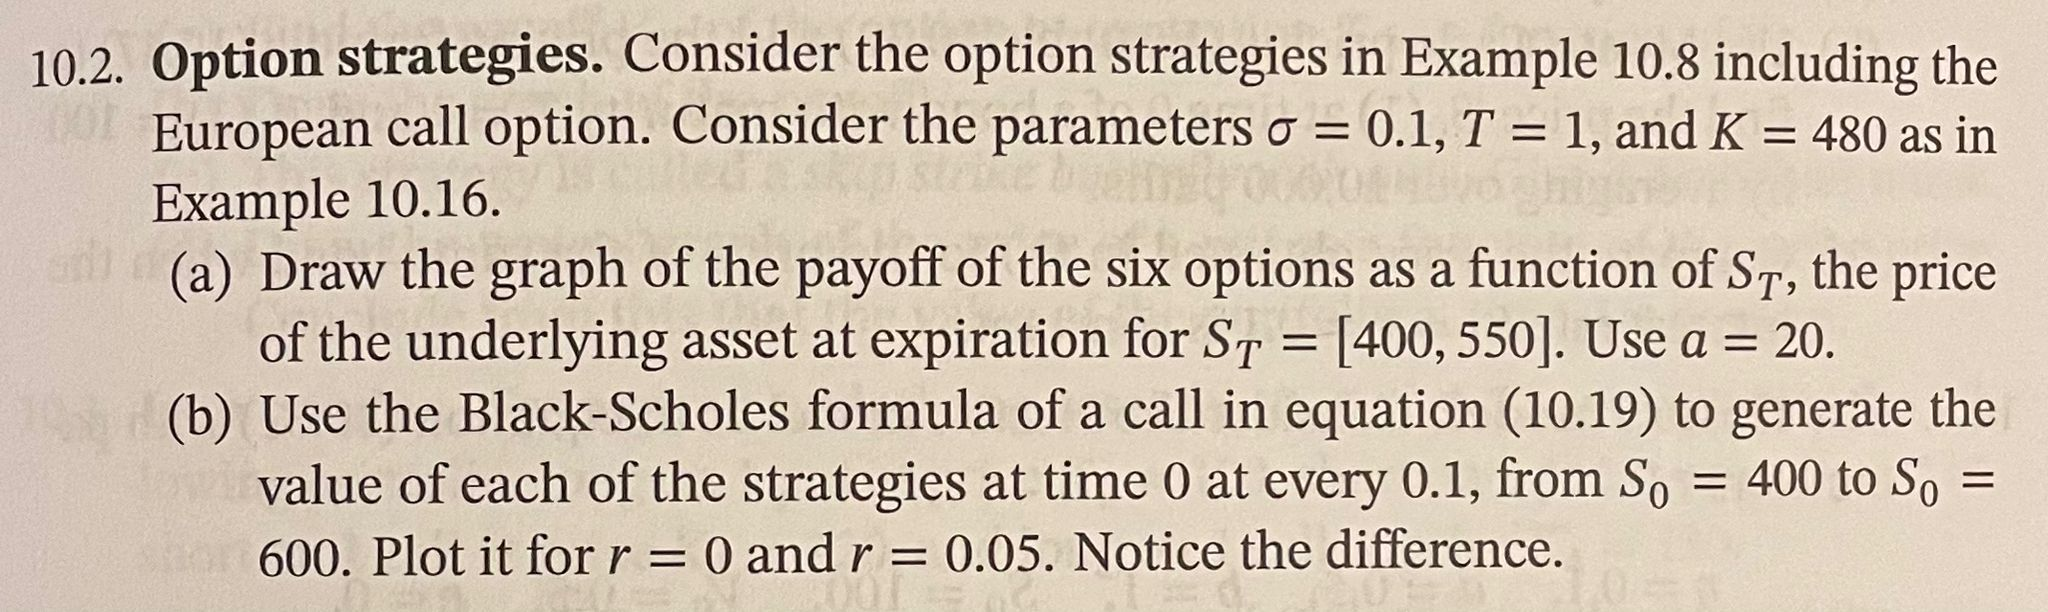

In [ ]:
#10.2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

sigma = 0.1
T = 1
K = 480
a = 20

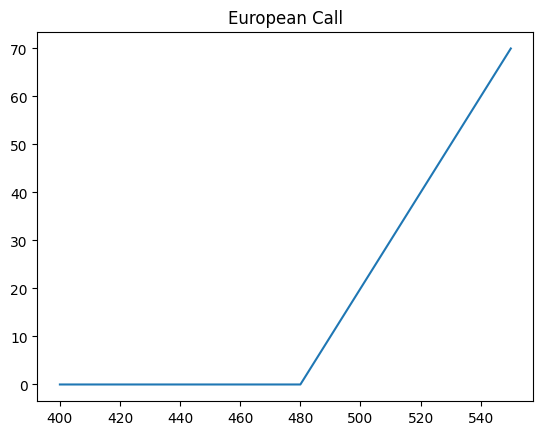

In [ ]:
#A 1 - European Call
x = np.linspace(400,550, 151)
EC = []
for s in range (400,551):
    if(s<=K):
        EC.append(0)
    else:
        EC.append(s-K)
plt.title("European Call")
plt.plot(x, EC)

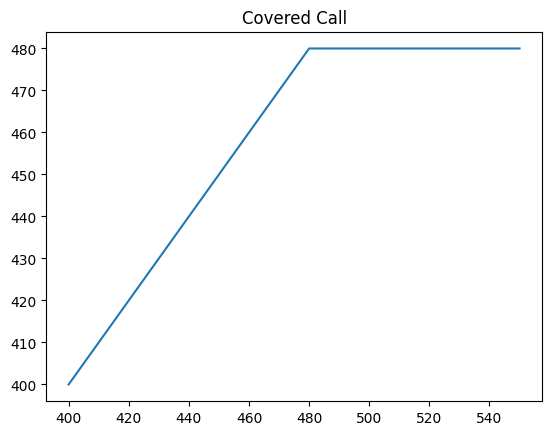

In [ ]:
#A 2 - Covered Call
x = np.linspace(400,550, 151)
CC = []
for s in range (400,551):
    if(s<=K):
        CC.append(s)
    else:
        CC.append(K)
plt.title("Covered Call")
plt.plot(x, CC)

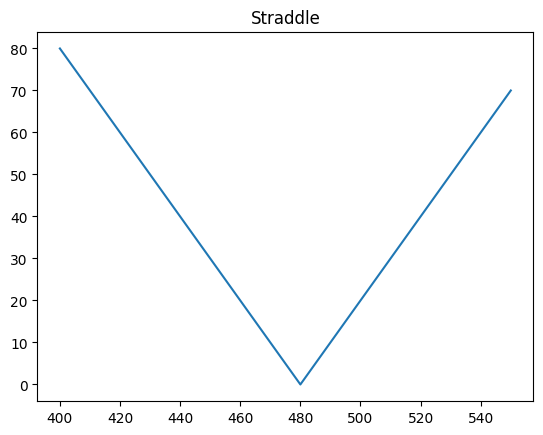

In [ ]:
#A 3 - Straddle
x = np.linspace(400,550, 151)
Str = []
for s in range (400,551):
    #if(s<=K):
    Str.append(abs(s-K))
    #else:
        #Str.append(K)
plt.title("Straddle")
plt.plot(x, Str)

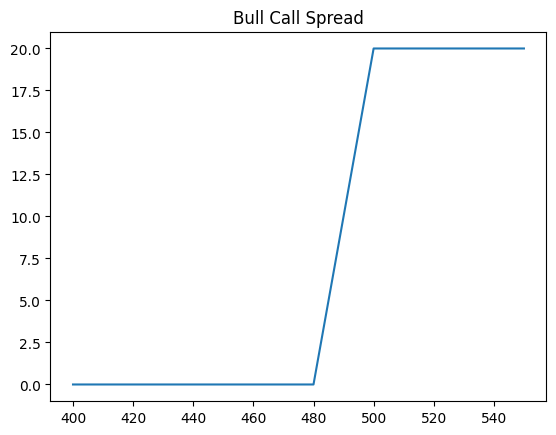

In [ ]:
#A 4 - Bull Call Spread
x = np.linspace(400,550, 151)
BCS = []
for s in range (400,551):
    if(s<=K):
        BCS.append(0)
    elif(s<=K+a):
        BCS.append(s-K)
    else:
        BCS.append(a)
plt.title("Bull Call Spread")
plt.plot(x, BCS)

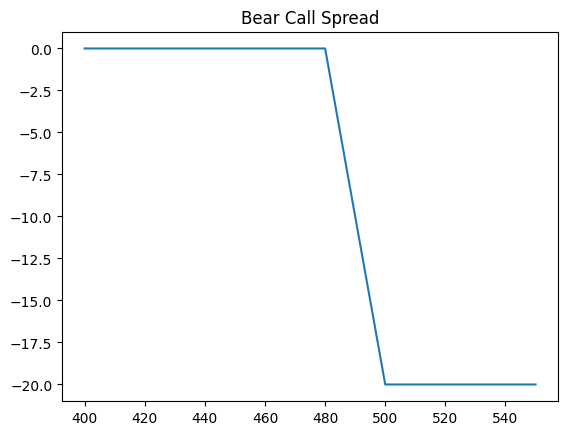

In [ ]:
#A 5 - Bear Call Spread
x = np.linspace(400,550, 151)
BearCS = []
for s in range (400,551):
    if(s<=K):
        BearCS.append(0)
    elif(s<=K+a):
        BearCS.append(K-s)
    else:
        BearCS.append(-a)
plt.title("Bear Call Spread")
plt.plot(x, BearCS)

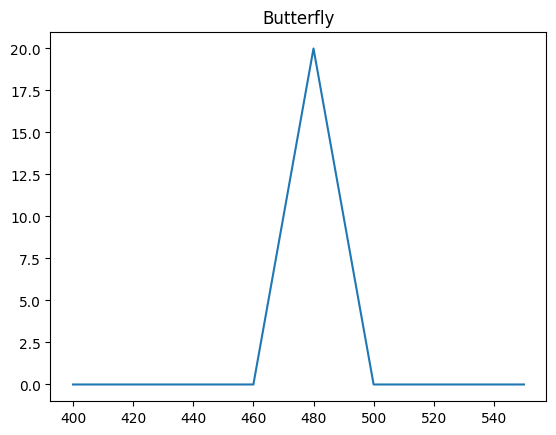

In [ ]:
#A 6 - Butterfly
x = np.linspace(400,550, 151)
Btf = []
for s in range (400,551):
    if(s<=K-a):
        Btf.append(0)
    elif(s<=K):
        Btf.append(s-(K-a))
    elif(s<=K+a):
        Btf.append(K+a-s)
    else:
        Btf.append(0)
plt.title("Butterfly")
plt.plot(x, Btf)

In [ ]:
def dplus(t, S, r, sigma, T, K):
    top = math.log(S/K) + (r+ (sigma)**2 /2)*(T-t)
    bot = sigma*math.sqrt(T-t)
    return top/bot

In [ ]:
def dminus(t, S, r, sigma, T, K):
    top = math.log(S/K) + (r- (sigma)**2 /2)*(T-t)
    bot = sigma*math.sqrt(T-t)
    return top/bot

Text(0.5, 1.0, 'European Call')

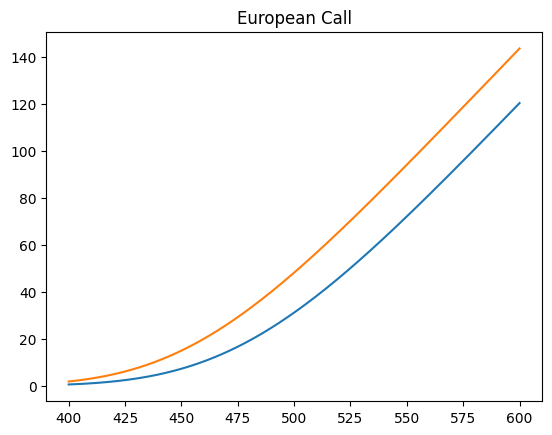

In [ ]:
#B 1 - European Call
x = np.linspace(400,600, 2010)
EC = []
t = 0
r = 0
for s in x:
    first = s*norm.cdf(dplus(0,s,r,sigma,T,K))
    second = K*math.exp(-r*(T-t))*norm.cdf(dminus(0,s,r,sigma,T,K))
    EC.append(first - second)
plt.plot(x, EC)
EC = []
r = 0.05
for s in x:
    first = s*norm.cdf(dplus(0,s,r,sigma,T,K))
    second = K*math.exp(-r*(T-t))*norm.cdf(dminus(0,s,r,sigma,T,K))
    EC.append(first - second)
plt.plot(x, EC)
plt.title("European Call")

Text(0.5, 1.0, 'Covered Call')

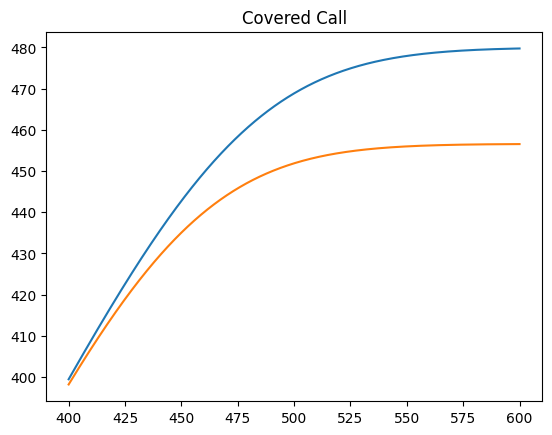

In [ ]:
#B 2 - Covered Call
x = np.linspace(400,600, 2010)
CC = []
t = 0
r = 0
for s in x:
    first = s*norm.cdf(dplus(0,s,r,sigma,T,K))
    second = K*math.exp(-r*(T-t))*norm.cdf(dminus(0,s,r,sigma,T,K))
    CC.append(-(first - second)+s)
plt.plot(x, CC)
CC = []
r = 0.05
for s in x:
    first = s*norm.cdf(dplus(0,s,r,sigma,T,K))
    second = K*math.exp(-r*(T-t))*norm.cdf(dminus(0,s,r,sigma,T,K))
    CC.append(-(first - second)+s)
plt.plot(x, CC)
plt.title("Covered Call")

Text(0.5, 1.0, 'Straddle')

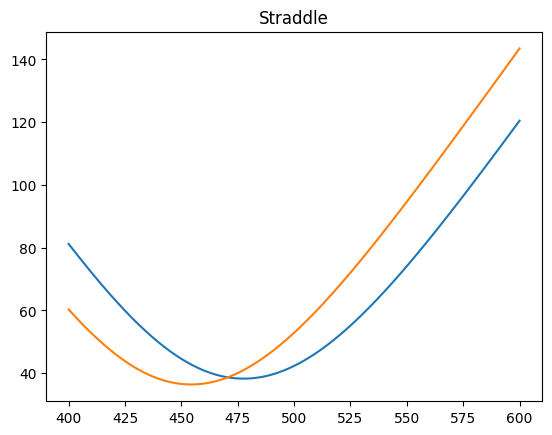

In [ ]:
#B 3 - Straddle
x = np.linspace(400,600, 2010)
CC = []
t = 0
r = 0
for s in x:
    first = s*norm.cdf(dplus(0,s,r,sigma,T,K))
    second = K*math.exp(-r*(T-t))*norm.cdf(dminus(0,s,r,sigma,T,K))
    third = s*norm.cdf(-dplus(0,s,r,sigma,T,K))
    fourth = K*math.exp(-r*(T-t))*norm.cdf(-dminus(0,s,r,sigma,T,K))
    CC.append((first - second)+(fourth - third))
plt.plot(x, CC)
CC = []
r = 0.05
for s in x:
    first = s*norm.cdf(dplus(0,s,r,sigma,T,K))
    second = K*math.exp(-r*(T-t))*norm.cdf(dminus(0,s,r,sigma,T,K))
    third = s*norm.cdf(-dplus(0,s,r,sigma,T,K))
    fourth = K*math.exp(-r*(T-t))*norm.cdf(-dminus(0,s,r,sigma,T,K))
    CC.append((first - second)+(fourth - third))
plt.plot(x, CC)
plt.title("Straddle")